In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import geopandas
import geoplot
from geopandas import GeoDataFrame

In [12]:
df = pd.read_csv('airbnb_clean.csv')
sampled_rows = df.sample(n=9)
sampled_rows.to_csv('airbnb_9.csv', index=False)

In [6]:
!pip install folium

In [8]:
import folium

In [6]:
df = pd.read_csv('Airbnb_Open_Data.csv',low_memory=False)

In [7]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [8]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [9]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<AxesSubplot:>

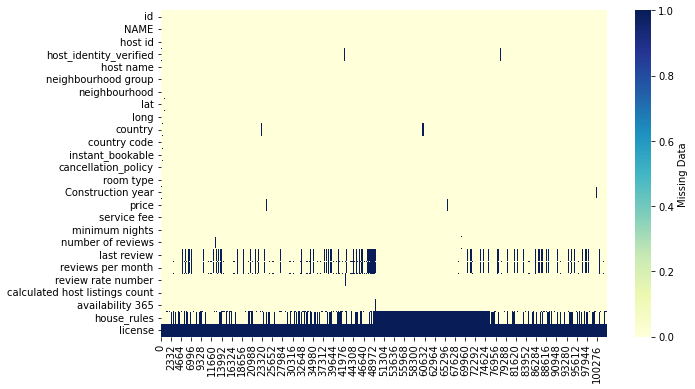

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [11]:
df_drop_na = df.drop(columns=['house_rules', 'license','reviews per month','last review'])

<AxesSubplot:>

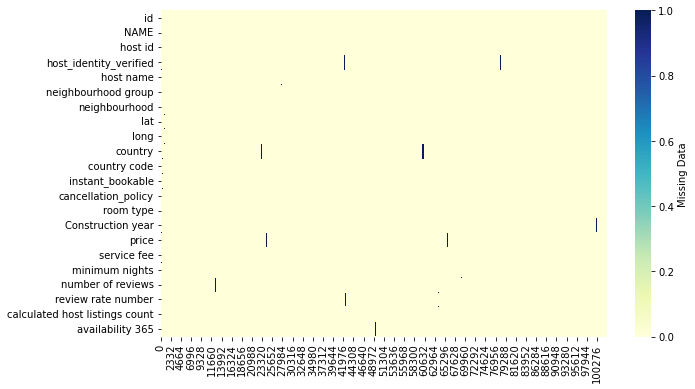

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df_drop_na.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [13]:
df_use = df[['host id','host name','neighbourhood group','lat','long','price','service fee','number of reviews']]

In [14]:
df_use = df_use.dropna()

<AxesSubplot:>

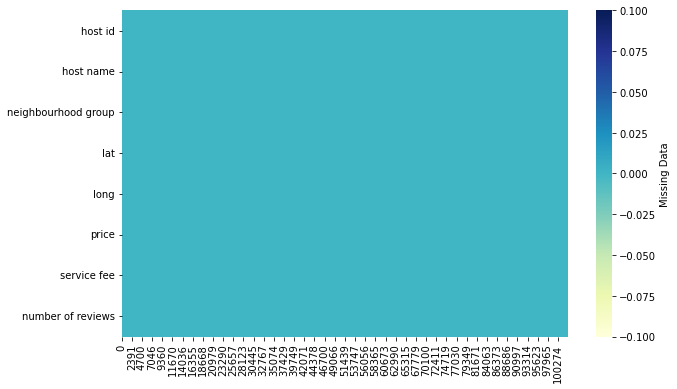

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_use.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [16]:
df_use = df_use.dropna()

In [17]:
df_use

,host id,host name,neighbourhood group,lat,long,price,service fee,number of reviews
0,80014485718,Madaline,Brooklyn,40.64749,-73.97237,$966,$193,9.0
1,52335172823,Jenna,Manhattan,40.75362,-73.98377,$142,$28,45.0
2,78829239556,Elise,Manhattan,40.80902,-73.94190,$620,$124,0.0
3,85098326012,Garry,Brooklyn,40.68514,-73.95976,$368,$74,270.0
4,92037596077,Lyndon,Manhattan,40.79851,-73.94399,$204,$41,9.0
...,...,...,...,...,...,...,...,...
102594,12312296767,Krik,Brooklyn,40.70862,-73.94651,$844,$169,0.0
102595,77864383453,Mifan,Manhattan,40.80460,-73.96545,$837,$167,1.0
102596,69050334417,Megan,Brooklyn,40.67505,-73.98045,$988,$198,0.0
102597,11160591270,Christopher,Queens,40.74989,-73.93777,$546,$109,5.0


In [18]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

In [19]:
df_use["price"] = df_use["price"].apply(lambda x: remove_dollar_sign(x))

In [20]:
df_use["service fee"] = df_use["service fee"].apply(lambda x: remove_dollar_sign(x))

In [21]:
df_use['neighbourhood group'] = df_use['neighbourhood group'].replace('brookln', 'Brooklyn')
df_use['neighbourhood group'] = df_use['neighbourhood group'].replace('manhatan', 'Manhattan')

In [22]:
df_use = df_use.rename(columns={'neighbourhood group':'borough'})

In [23]:
df_use

,host id,host name,borough,lat,long,price,service fee,number of reviews
0,80014485718,Madaline,Brooklyn,40.64749,-73.97237,966.0,193.0,9.0
1,52335172823,Jenna,Manhattan,40.75362,-73.98377,142.0,28.0,45.0
2,78829239556,Elise,Manhattan,40.80902,-73.94190,620.0,124.0,0.0
3,85098326012,Garry,Brooklyn,40.68514,-73.95976,368.0,74.0,270.0
4,92037596077,Lyndon,Manhattan,40.79851,-73.94399,204.0,41.0,9.0
...,...,...,...,...,...,...,...,...
102594,12312296767,Krik,Brooklyn,40.70862,-73.94651,844.0,169.0,0.0
102595,77864383453,Mifan,Manhattan,40.80460,-73.96545,837.0,167.0,1.0
102596,69050334417,Megan,Brooklyn,40.67505,-73.98045,988.0,198.0,0.0
102597,11160591270,Christopher,Queens,40.74989,-73.93777,546.0,109.0,5.0


In [24]:
df_use.dtypes

host id                int64
host name             object
borough               object
lat                  float64
long                 float64
price                float64
service fee          float64
number of reviews    float64
dtype: object

In [25]:
# Define a function for plotting a geomap
def geodf(x, y):
        geo_df[geo_df['borough']== x].plot(ax=ax, markersize=5, alpha=1,color=y, label=x)

In [26]:
crs={'init':'epsg:4326'}
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df=geopandas.GeoDataFrame(df_use,crs=crs,geometry=geopandas.points_from_xy(df_use["long"], df_use["lat"]))

/home/nasvirat/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


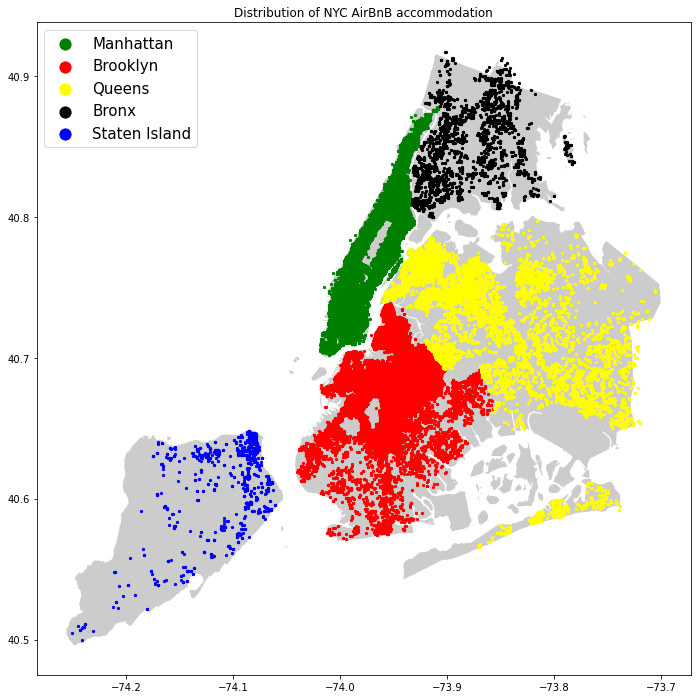

In [27]:
borough = {'Manhattan':'green', 'Brooklyn':'red', 'Queens':'yellow', 'Bronx':'black', 'Staten Island':'blue'}
fig,ax=plt.subplots(figsize=(12,12))
boroughs.plot(ax=ax,alpha=0.4,color="grey").set(title='Distribution of NYC AirBnB accommodation')
for x,y in borough.items():
    geodf(x, y)
plt.legend(fontsize=15, markerscale=5)

In [28]:
df_Manhattan = df_use[df_use['borough'] == 'Manhattan']

In [29]:
df_Manhattan

,host id,host name,borough,lat,long,price,service fee,number of reviews,geometry
1,52335172823,Jenna,Manhattan,40.75362,-73.98377,142.0,28.0,45.0,POINT (-73.98377 40.75362)
2,78829239556,Elise,Manhattan,40.80902,-73.94190,620.0,124.0,0.0,POINT (-73.94190 40.80902)
4,92037596077,Lyndon,Manhattan,40.79851,-73.94399,204.0,41.0,9.0,POINT (-73.94399 40.79851)
5,45498551794,Michelle,Manhattan,40.74767,-73.97500,577.0,115.0,74.0,POINT (-73.97500 40.74767)
8,79384379533,Evelyn,Manhattan,40.76489,-73.98493,1018.0,204.0,430.0,POINT (-73.98493 40.76489)
...,...,...,...,...,...,...,...,...,...
102591,50908010324,Lawrence,Manhattan,40.77408,-73.98181,1139.0,228.0,17.0,POINT (-73.98181 40.77408)
102592,53266862889,Nick,Manhattan,40.71845,-74.01183,787.0,157.0,0.0,POINT (-74.01183 40.71845)
102593,33188605074,Felipe,Manhattan,40.72826,-73.98422,1099.0,220.0,8.0,POINT (-73.98422 40.72826)
102595,77864383453,Mifan,Manhattan,40.80460,-73.96545,837.0,167.0,1.0,POINT (-73.96545 40.80460)


In [30]:
df_Manhattan.to_csv('airbnb_clean_Manhattan.csv',index=True)

In [31]:
df_Brooklyn = df_use[df_use['borough'] == 'Brooklyn']

In [32]:
df_Brooklyn

,host id,host name,borough,lat,long,price,service fee,number of reviews,geometry
0,80014485718,Madaline,Brooklyn,40.64749,-73.97237,966.0,193.0,9.0,POINT (-73.97237 40.64749)
3,85098326012,Garry,Brooklyn,40.68514,-73.95976,368.0,74.0,270.0,POINT (-73.95976 40.68514)
6,61300605564,Alberta,Brooklyn,40.68688,-73.95596,71.0,14.0,49.0,POINT (-73.95596 40.68688)
7,90821839709,Emma,Brooklyn,40.68688,-73.95596,1060.0,212.0,49.0,POINT (-73.95596 40.68688)
13,26802410424,Darcy,Brooklyn,40.66829,-73.98779,580.0,116.0,167.0,POINT (-73.98779 40.66829)
...,...,...,...,...,...,...,...,...,...
102587,20914678851,Taylor,Brooklyn,40.71687,-73.94656,388.0,78.0,66.0,POINT (-73.94656 40.71687)
102589,74549151787,Dave,Brooklyn,40.65231,-73.96189,306.0,61.0,0.0,POINT (-73.96189 40.65231)
102590,9184535139,Daniel,Brooklyn,40.66673,-73.96127,250.0,50.0,0.0,POINT (-73.96127 40.66673)
102594,12312296767,Krik,Brooklyn,40.70862,-73.94651,844.0,169.0,0.0,POINT (-73.94651 40.70862)


In [33]:
df_Brooklyn.to_csv('airbnb_clean_Brooklyn.csv',index=True)

In [34]:
df_Queens = df_use[df_use['borough'] == 'Queens']

In [35]:
df_Queens.to_csv('airbnb_clean_Queens.csv',index=True)

In [36]:
df_Bronx = df_use[df_use['borough'] == 'Bronx']

In [37]:
df_Bronx.to_csv('airbnb_clean_Bronx.csv',index=True)

In [38]:
df_Staten_Island = df_use[df_use['borough'] == 'Staten Island']

In [39]:
df_Staten_Island.to_csv('airbnb_clean_Staten_Island.csv',index=True)

In [9]:
df_solution = pd.read_csv('solution.csv')

In [10]:
df_solution

,Unnamed: 0,id,host_id,host_name,borough,lat,long,price,service_fee,number_reviews,geometry
0,0,101506,23099611926,Michael,Brooklyn,40.682550,-73.992810,815,163,4,POINT (-73.99281000000001 40.68255)
1,1,16346,80473749153,Angela,Brooklyn,40.684570,-73.969690,864,173,11,POINT (-73.96969 40.68457)
2,2,88138,84230036757,Anthony,Brooklyn,40.686340,-73.966100,329,66,47,POINT (-73.9661 40.68634)
3,3,27770,28092359216,Mary,Brooklyn,40.674710,-73.964080,533,107,62,POINT (-73.96408 40.67471)
4,4,94905,48587620868,Brendan,Brooklyn,40.666730,-73.961580,728,146,43,POINT (-73.96158 40.66673)
5,5,58293,93114028234,Royal,Brooklyn,40.683610,-73.957730,781,156,3,POINT (-73.95773 40.68361)
6,6,19710,16929322833,George,Brooklyn,40.688990,-73.955550,401,80,0,POINT (-73.95555 40.68899)
7,7,59346,50788260460,Paula,Brooklyn,40.683730,-73.938850,793,159,67,POINT (-73.93885 40.68373)
8,8,39814,18204554590,Megan,Brooklyn,40.683530,-73.935660,843,169,0,POINT (-73.93566 40.68353)
9,9,563,51579822752,Joyce,Brooklyn,40.690250,-73.933230,128,26,30,POINT (-73.93322999999999 40.69025)


In [6]:
df_solution = pd.read_csv('solution/solution.csv')

In [9]:
m = folium.Map(location=[40.69183, -73.86272], zoom_start=11)
	
folium.TileLayer('stamenterrain').add_to(m)

place_lat = df_solution['lat'].values.tolist()
place_lng = df_solution['long'].values.tolist()

points = []
for i in range(len(place_lat)):
    points.append([place_lat[i], place_lng[i]])

for index,lat in enumerate(place_lat):
    folium.Marker([lat, 
                   place_lng[index]],
                  popup=(f"Hotel:{index}\n"),
                 icon = folium.Icon(color='darkblue',icon='plus')).add_to(m)
folium.PolyLine(points, color='red').add_to(m)


In [10]:
m

In [11]:
m.save("airbnb_12_solution.html")